In [61]:
import pandas as pd
tmp = pd.read_csv('merged_data.csv', encoding='cp949')
tmp.head()

,기준년도,가입자일련번호,시도코드,성별,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),...,요단백,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석
0,2018,1,48,2,7,160,60,79.5,1.5,1.5,...,1.0,0.5,21.0,8.0,12.0,1.0,NaN,0,NaN,NaN
1,2018,2,26,1,6,170,55,69.3,1.2,0.8,...,1.0,1.0,35.0,45.0,47.0,1.0,1.0,1,0.0,0.0
2,2018,3,28,1,12,165,70,85.0,0.8,0.8,...,NaN,1.1,77.0,47.0,21.0,2.0,1.0,1,0.0,0.0
3,2018,4,27,2,15,150,45,71.5,0.4,0.3,...,1.0,0.6,19.0,10.0,13.0,1.0,NaN,1,0.0,0.0
4,2018,5,41,2,14,145,50,77.0,0.7,0.6,...,1.0,0.5,26.0,26.0,12.0,1.0,1.0,0,NaN,NaN


# BMI 연산용 데이터만 남기고 연도별로 데이터 최소화

In [63]:
# 단계별 수정됨... : 신장, 체중 + 성별 + 나이

y = list(set(tmp['기준년도']))
for l in y:
    t = tmp[tmp['기준년도']==l][['신장(5cm단위)', '체중(5kg단위)', '성별', '연령대코드(5세단위)']]
    t.columns = ['height', 'weight', 'sex', 'age']
    print(f'{l} : \n {t.head()} \n {t.info()}')
    t.to_csv(f'shortened_data_{l}.csv')

<class 'pandas.core.frame.DataFrame'>
Index: 1000000 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype
---  ------  --------------    -----
 0   height  1000000 non-null  int64
 1   weight  1000000 non-null  int64
 2   sex     1000000 non-null  int64
 3   age     1000000 non-null  int64
dtypes: int64(4)
memory usage: 38.1 MB
2018 : 
    height  weight  sex  age
0     160      60    2    7
1     170      55    1    6
2     165      70    1   12
3     150      45    2   15
4     145      50    2   14 
 None
<class 'pandas.core.frame.DataFrame'>
Index: 1000000 entries, 1000000 to 1999999
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype
---  ------  --------------    -----
 0   height  1000000 non-null  int64
 1   weight  1000000 non-null  int64
 2   sex     1000000 non-null  int64
 3   age     1000000 non-null  int64
dtypes: int64(4)
memory usage: 38.1 MB
2019 : 
          height  weight  sex  age
1000000     165      65    1   1

In [46]:
t['bmi'] = t['weight'] / ( t['height'] / 100 ) ** 2
t.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000000 entries, 4000000 to 4999999
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   height  1000000 non-null  int64  
 1   weight  1000000 non-null  int64  
 2   sex     1000000 non-null  int64  
 3   bmi     1000000 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 38.1 MB


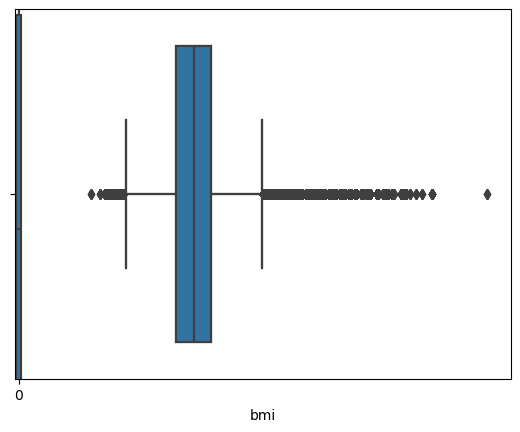

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
# sns.barplot(t['bmi'])
sns.boxplot(x = t['bmi'])
plt.show()